Testing the hexagon binning using tenure and outcome from the intermediate patients dataset

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html

need 
                       C=None, 
                       reduce_C_function=None, 
when using a third? variable as C

In [1]:
# Funtion to identify and print easy to understand variable types 
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count == total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [2]:
import numpy as np
import pandas as pd

# Setup HTML display
#from IPython.core.display import display, HTML
# Notebook cell width adjustment
#display(HTML('<style>.container { width:80% !important; }</style>'))

In [3]:
import os, time
print(os.getcwd())
readStart=time.time()

# Edit the file name to make sure you are pointing to the right file.
dfPatients = pd.read_csv(r'../data/02_intermediate/dfPatients_dedup.csv', 
                        na_values=['NA'])

# Stop the clock and calculate read time
readStop=time.time()
readTime=readStop-readStart
readMin=np.floor(readTime/60)
readSec=np.floor(readTime-(readMin*60))
print("The file was read in {0:.0f} minutes and {1:.0f} seconds.".format(readMin,readSec))

dfPatients.shape

E:\github\ems-analytics\notebooks
The file was read in 0 minutes and 1 seconds.


(543258, 22)

In [4]:
print_categories(dfPatients)

Unnamed: 0 :  Numerical
PatientId :  Numerical
FRDPersonnelID :  Categorical
Shift :  Categorical
UnitId :  Categorical
FireStation :  Numerical
Battalion :  Numerical
PatientOutcome :  Categorical
PatientGender :  Categorical
DispatchTime :  Categorical
FRDPersonnelGender :  Categorical
FRDPersonnelStartDate :  Categorical
CrewMemberRoles :  Categorical
TenureMonths :  Numerical
ShiftCode :  Numerical
Shift_A :  Numerical
Shift_B :  Numerical
Shift_C :  Numerical
UnitIdCode :  Numerical
PatientOutcomeCode :  Numerical
PatientGenderCode :  Numerical
ProviderGenderCode :  Numerical


set up hexbin plot # 1

X axis is PatientOutcomeCode

Y axis is TenureMonths

<AxesSubplot:xlabel='PatientOutcomeCode', ylabel='TenureMonths'>

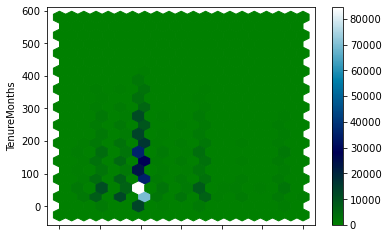

In [5]:
dfPatients.plot.hexbin(x='PatientOutcomeCode', 
                       y='TenureMonths', 
                       gridsize=20,
                       cmap="ocean")

set up hexbin plot # 2

flip x and y, change the cmap, and change the grid size

<AxesSubplot:xlabel='TenureMonths', ylabel='PatientOutcomeCode'>

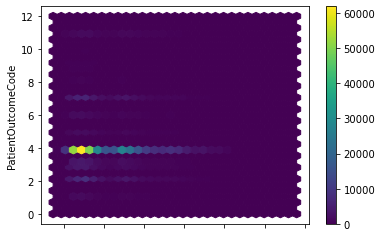

In [6]:
dfPatients.plot.hexbin(x='TenureMonths', 
                       y='PatientOutcomeCode', 
                       gridsize=30,
                       cmap="viridis")

set up hexbin plot # 3

change the grid size, and test out a different cmap

<AxesSubplot:xlabel='TenureMonths', ylabel='PatientOutcomeCode'>

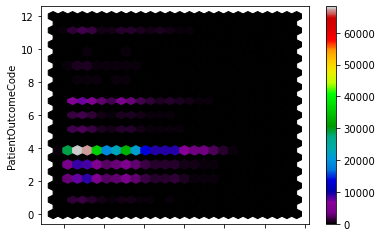

In [7]:
dfPatients.plot.hexbin(x='TenureMonths', 
                       y='PatientOutcomeCode', 
                       gridsize=25,
                       cmap="nipy_spectral")

straight histogram, but keeping the same x and y as plot # 3

end up with histogram of the y axis

<AxesSubplot:ylabel='Frequency'>

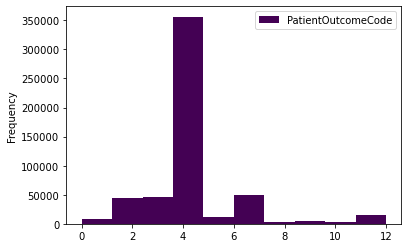

In [8]:
dfPatients.plot.hist(x='TenureMonths', 
                     y='PatientOutcomeCode', 
                     cmap="viridis")

straight histogram, but flipping x and y (again)

still end up with histogram of the y axis

<AxesSubplot:ylabel='Frequency'>

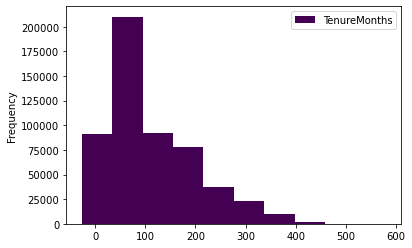

In [9]:
dfPatients.plot.hist(x='PatientOutcomeCode', 
                     y='TenureMonths', 
                     cmap="viridis")

set up hexbin plot # 4, same settings at # 3 but adjusting the plot size and adding explicit axes labels and a title

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

figsize includes the side scale, so need to take that into account when picking a size for the width value

<AxesSubplot:title={'center':'Tenure and Patient Outcome'}, xlabel='Tenure', ylabel='Patient Outcome'>

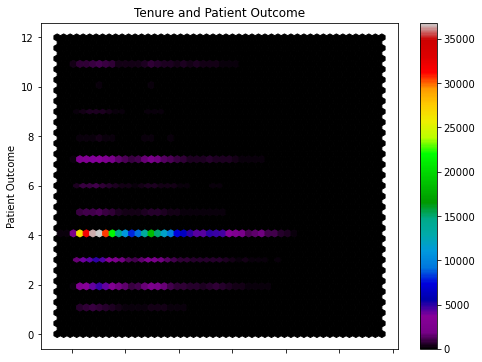

In [10]:
dfPatients.plot.hexbin(x='TenureMonths', 
                       y='PatientOutcomeCode', 
                       gridsize=50,
                       cmap="nipy_spectral",
                       xlabel="Tenure",
                       ylabel="Patient Outcome",
                       title="Tenure and Patient Outcome",
                       figsize=(8,6))

found a stackoverflow posting that suggested including sharex=False to get the x axis label to show

https://stackoverflow.com/questions/31220329/pandas-dataframe-hexbin-plot-has-no-xlabel-or-axis-values

resetting hexbin plot # 4 including sharex attribute

<AxesSubplot:title={'center':'Tenure and Patient Outcome'}, xlabel='Tenure', ylabel='Patient Outcome'>

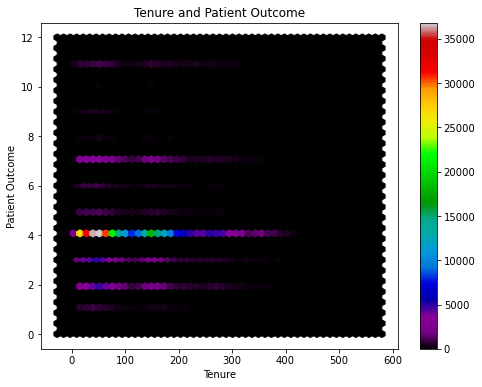

In [11]:
dfPatients.plot.hexbin(x='TenureMonths', 
                       y='PatientOutcomeCode', 
                       gridsize=50,
                       cmap="nipy_spectral",
                       xlabel="Tenure",
                       ylabel="Patient Outcome",
                       title="Tenure and Patient Outcome",
                       figsize=(8,6),
                       sharex=False)

set up hexbin plot # 5

change x to straight PatientOutcome

In [12]:
dfPatients.plot.hexbin(x='PatientOutcome', 
                       y='TenureMonths', 
                       gridsize=20,
                       cmap="ocean")

ValueError: hexbin requires x column to be numeric